# Muon flux vs altitude



In the "Cosmic rays at earth" by Grieder, we found the following interesting diagram, plotting the muon 
integral intensity in function of the pressure found on page 247.

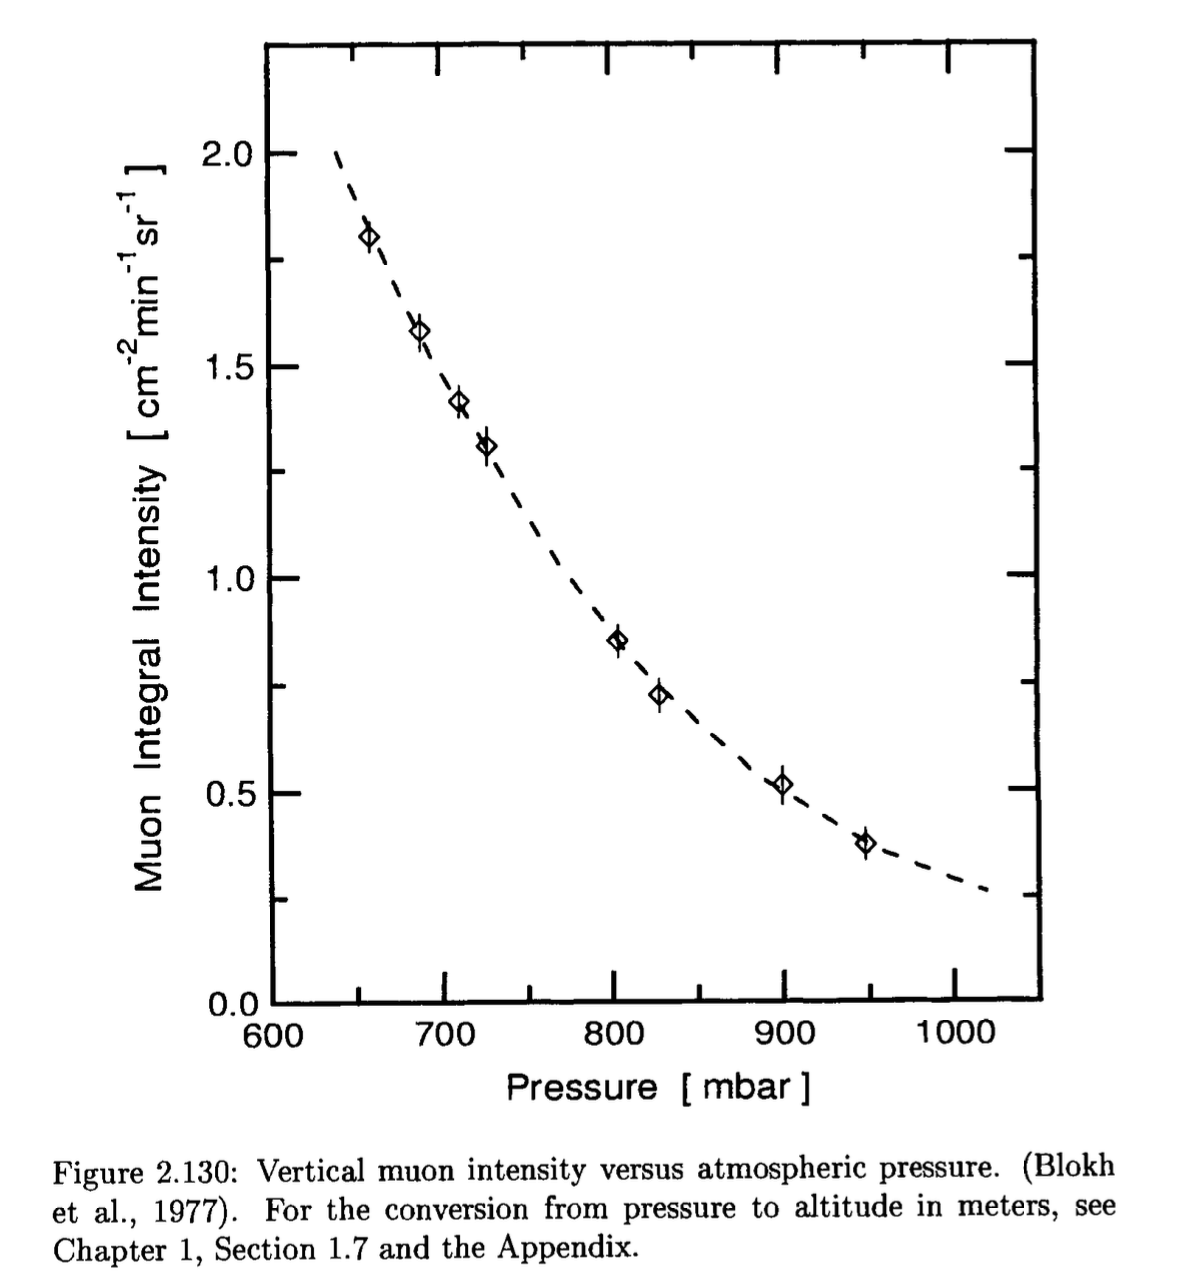

In [1]:
from IPython.display import Image

fig = Image(filename=('./Plot_mf_pressure.png'))
fig

We replot the diagram in the following cell.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Remember 1 Pascal = 0.01 mbar

x  = np.array([640, 670, 700, 735, 775, 830,900,1050]) #pressure in mbar
y = np.array([2, 1.75, 1.5, 1.25, 1, 0.75, 0.5, 0.25]) #muon integral intensity

a_guess = 2
b_guess = -0.2
c_guess = 200
d_guess = 1

# Fit the function a * np.exp(b * t + c) + d to x and y
popt, pcov = curve_fit(
    lambda t, a, b, c,d : a * np.exp(b * t + c) + d,
    x, y, p0=(a_guess, b_guess, c_guess, d_guess))

# The optimised values of the parameters are
a = popt[0]
b = popt[1]
c = popt[2]
d = popt[3]


# Fitting parameters
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)


# Create the fitted curve
x_fitted = np.linspace(600, 1100, 100)
y_fitted = a * np.exp(b * x_fitted + c) + d

plt.figure(figsize=(14, 6), dpi=800)
plt.plot(x, y, ".", label = "Data")
plt.plot(x_fitted, y_fitted, '--', color='red', label = "Fit")
plt.legend()
plt.xlabel("Pressure in mbar")
plt.ylabel("Muon integral intensity in cm^-2 min^-1 sr^-1")
plt.grid()
plt.show()

: 

So we have the relation:

$y = 51.994 \cdot e^{(-0.005 \cdot x + 0.023)} -0.019$


For the conversion from pressure to altitude in meters, we have the following relation.

Air pressure above sea level can be calculated as:

$p = 101325 (1 - 2.25577*10^{-5} h)^{5.25588} $, where

101325 = normal temperature and pressure at sea level (Pa)

p = air pressure (Pa)

h = altitude above sea level (m)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = np.linspace(0,15000,150)

# pressure in mbar in function of altitude above sea level in m
# 1 Pa = 0.01 mbar
def pressure_vs_altitude(h):
    return 101325*(1-2.25577*10**(-5) * h)**(5.25588) / 100  # source: https://www.engineeringtoolbox.com/air-altitude-pressure-d_462.html

#Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.plot(h, pressure_vs_altitude(h), "--", label = "Data")
plt.legend()
plt.xlabel("Altitude in m")
plt.ylabel("Pressure in mbar")
plt.grid()
plt.show()

: 

So, we get the following plot showing the vertical muon intensity versus altitude.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# vertical (\theta = 0) muon intensity versus altitude
def muon_vs_alt(alt):
    return a * np.exp(b * pressure_vs_altitude(alt) + c) + d

alt = np.linspace(0,11000,110)

# Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.title("Predicted muon integral intensity in function of altitude")
plt.plot(alt, muon_vs_alt(alt), "--", label = "Muon integral intensity")
plt.legend()
plt.xlabel("Altitude above sea level in m")
plt.ylabel("Muon integral intensity in cm^-2 min^-1 sr^-1")
plt.grid()
plt.show()


: 

In our case, we have (if we now only consider the top plate of our setup) a surface of around $A = 4 \cdot (1.2 cm \cdot 5.8 cm) = 27.84 cm^2$


So in our case, we have:

In [ ]:
# Plot
plt.figure(figsize=(14, 6), dpi=800)
plt.title("Vertical muon rate per unit time and per unit solid angle in function of altitude")
plt.plot(alt, muon_vs_alt(alt)*27.84/60, "--", label = "Muon rate")
plt.legend()
plt.xlabel("Altitude above sea level in m")
plt.ylabel("Muon rate in s^-1 sr^-1")
plt.grid()
plt.show()

: 

Let us compare this to actual results from papers:
For instance, we have at sea level an approximate rate of slightly less than one muon per square centimeter, per minute. This corresponds to $0.01 s^{-1} cm^{-2} sr^{-1}$, and in case of our setup with an area of $27.84 cm^2$ this leads to approximately 0.27 muons per second per steradian. Using the muon/altitude relation we have derived, this would then give: 

In [ ]:
h_0 = muon_vs_alt(0)*27.84/60
print(h_0)

: 

Remember, that this is the vertical intensity. Next, we want to calculate the total intensity. We have the following zenith angle dependence formula:
$I(\theta) = I(0)\cdot \cos^n (\theta)$, where $n_{air}$ is approximately $2.687\cdot 10^{19} cm^{-3}$. This enables us then to compute the general angular dependence of the muon integral intensity.

In [ ]:
theta = np.linspace(-90, 90,360) # theta ranging from -90 to 90 degrees
theta_r = np.deg2rad(theta)
n_air = 2.687         # n_air according to book 

#n_air2 = 2.145         # according to https://www.mdpi.com/2410-390X/6/4/78, but n stays approx. constant up to 50 km

def I_theta(h, angle):
    return muon_vs_alt(h)*(np.cos(angle))**n_air 

plt.figure(figsize=(14, 6), dpi=800)
plt.title("Angular dependence of muon rate")
plt.plot(theta, I_theta(0, theta_r) , "-", label = "0 m")
plt.plot(theta, I_theta(1000, theta_r) , "-", label = "1000 m")
plt.plot(theta, I_theta(2000, theta_r) , "-", label = "2000 m")
plt.plot(theta, I_theta(3000, theta_r) , "-", label = "3000 m")
plt.plot(theta, I_theta(4000, theta_r) , "-", label = "4000 m")
plt.plot(theta, I_theta(5000, theta_r) , "-", label = "5000 m")
plt.plot(theta, I_theta(6000, theta_r) , "-", label = "6000 m")
plt.plot(theta, I_theta(7000, theta_r) , "-", label = "7000 m")
plt.plot(theta, I_theta(8000, theta_r) , "-", label = "8000 m")
plt.plot(theta, I_theta(9000, theta_r) , "-", label = "9000 m")
plt.plot(theta, I_theta(10000, theta_r) , "-", label = "10000 m")
plt.plot(theta, I_theta(11000, theta_r) , "-", label = "11000 m")
plt.plot(theta, I_theta(12000, theta_r) , "-", label = "12000 m")
plt.legend()
plt.xlabel("theta in deg.")
plt.ylabel("Muon integral intensity in cm^-2 min^-1 sr^-1")
plt.grid()
plt.show()

: 

Now, we can integrate this over $\theta$ in order to get the muon intensity for the angles $-\pi/2$ to $\pi/2$. 

In [ ]:
# Expression: I(theta) = muon_vs_alt(h)*(np.cos(theta))**n_air -> integrate over theta from -pi/2 to pi/2

import scipy.integrate as integrate

cos_integrand,_ = integrate.quad(lambda t: np.cos(t)**n_air, -np.pi/2, np.pi/2)

# So we get the following muon integral intensity for the different heights integrated over the angles -pi/2 to pi/2

I_g_0 = muon_vs_alt(0)*cos_integrand # general muon intensity for altitude h=0
I_g_1000 = muon_vs_alt(1000)*cos_integrand
I_g_2000 = muon_vs_alt(2000)*cos_integrand
I_g_3000 = muon_vs_alt(3000)*cos_integrand
I_g_4000 = muon_vs_alt(4000)*cos_integrand
I_g_5000 = muon_vs_alt(5000)*cos_integrand
I_g_6000 = muon_vs_alt(6000)*cos_integrand
I_g_7000 = muon_vs_alt(7000)*cos_integrand
I_g_8000 = muon_vs_alt(8000)*cos_integrand
I_g_9000 = muon_vs_alt(9000)*cos_integrand
I_g_10000 = muon_vs_alt(10000)*cos_integrand
I_g_11000 = muon_vs_alt(11000)*cos_integrand
I_g_12000 = muon_vs_alt(12000)*cos_integrand

# make table with data

from tabulate import tabulate

table = [['Altitude [m]', 'Muon integral intensity [cm^-2 min^-1]'], 
         [0, I_g_0], [1000, I_g_1000], [2000, I_g_2000], [3000, I_g_3000], [4000, I_g_4000], [5000, I_g_5000], [6000, I_g_6000], [7000, I_g_7000], [8000, I_g_8000], [9000, I_g_9000], [10000, I_g_10000], [11000, I_g_11000],[12000, I_g_12000]]

print(tabulate(table))

: 

We would expect the value $1 muon s^-1 cm^-1$ at sea level, however, here we get slightly less namely $0.4 muon s^-1 cm^-1$. We would argue that this is due to the fact that our approximation relies on empirical data that was not sufficient to precisely determine the expected flux at sea level. This might result in a slightly larger flux when we will actually measure.

Finally, we adapt this to our whole qubic setup. The top plate has an area of around $26.88 cm^2$ (here, the flux will be computed as above, ranging from the angles $-\pi/2$ to $\pi/2$). Then, one sideplate has an area of $8\cdot 1.2 cm \cdot 1.2 cm + 2\cdot 5.6 cm\cdot1.2 cm = 24.96 cm^2$. Here, the angles range from $-\pi/2$ to $0$. Since the angular distribution is symmetric, we can assume the same for the other sideplates. Thus, to sum up, we have:

Top plate : $26.88 cm^2$ ranging $-\pi/2$ to $\pi/2$,

4 side plates: $4 \cdot 24.96 cm^2 = 99.84 cm^2 $ ranging from $-\pi/2$ to $0$.

In [ ]:
# essentially, we need to compute the same as above, just for a different angular range (for the sideplates)

import scipy.integrate as integrate

cos_integrandfull,_ = integrate.quad(lambda t: np.cos(t)**n_air, -np.pi/2, np.pi/2)
cos_integrandhalf,_ = integrate.quad(lambda t: np.cos(t)**n_air, -np.pi/2, 0)

# Compute muon flux in s^-1 sr^-1 for qubic setup

# Top plate
def mf_tp(h):
    return muon_vs_alt(h)*cos_integrandfull * 26.88/60

# 4 side plates
def mf_sps(h):
    return muon_vs_alt(h)*cos_integrandhalf * 99.84/60

# all together
def mf(h):
    return mf_tp(h) + mf_sps(h)


# make table with data

table = [['Altitude [m]', 'Muon flux rate [s^-1]'], 
         [0, mf(0)], [1000, mf(1000)], [2000, mf(2000)], [3000, mf(3000)], [4000, I_g_4000], [5000, mf(5000)], [6000, mf(6000)], [7000, mf(7000)], [8000, mf(8000)], [9000, mf(9000)], [10000, mf(10000)], [11000, mf(11000)],[12000, mf(12000)]]

print(tabulate(table))

: 

In [ ]:
# Plot bar diagram

height = np.array([mf(0), mf(1000), mf(2000), mf(3000), mf(4000), mf(5000), mf(6000), mf(7000), mf(8000), mf(9000), mf(10000), mf(11000), mf(12000)])
bars = np.array([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000])

y_pos = np.arange(len(bars))

plt.figure(figsize=(14, 6), dpi=800)

# Create bars
plt.grid()
plt.bar(y_pos, height)
plt.xlabel("Altitude in m")
plt.ylabel("Muon flux rate in s^-1")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()


# Fitting curve diagram

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fit the function e * np.exp(f * t + g) + h to x and y

e_guess = 0.002
f_guess = 0.00001
g_guess = 0.6
h_guess = 0

popt, pcov = curve_fit(
    lambda t, e, f, g,h : e * np.exp(f * t + g) + h,
    bars, height, p0=(e_guess, f_guess, g_guess, h_guess))

# The optimised values of the parameters are
e = popt[0]
f = popt[1]
g = popt[2]
h = popt[3]


# Fitting parameters
print("e:", e)
print("f:", f)
print("g:", g)
print("h:", h)


# Create the fitted curve
bars_fit = np.linspace(0, 12000, 120)
height_fit = e * np.exp(f * bars_fit + g) + h

plt.figure(figsize=(14, 6), dpi=800)
plt.plot(bars, height, ".", label = "Data")
plt.plot(bars_fit, height_fit, '--', color='red', label = "Fit")
plt.legend()
plt.xlabel("Altitude [m]")
plt.ylabel("Muon flux [s^-1]")
plt.grid()
plt.show()


: 

From our simulations team, we acquired the simulated flight path and velocity (in z-direction) from our rocket, but only for around 6500 m. They are depicted in the following cells.

In [ ]:
fig1 = Image(filename=('./altitude-1.png'))
fig1

: 

In [ ]:
fig2 = Image(filename=('./velocity-1.png'))
fig2

: 

We also plotted the time versus altitude and velocity from last year's rocket and we see that our estimated velocities for the different stages should be valid.

In [ ]:
fig3 = Image(filename=('./Altitude_Helvetia.png'))
fig3

: 

In [ ]:
fig4 = Image(filename=('./Velocity_Helvetia.png'))
fig4

: 

Now, we seek to find the number of muons per second per steradian for the different stages. 

According to the recovery team leader, the (vertical) drogue velocity can be well approximated by 27.0 m/s while the main velocity is around 6.3 m/s.

We now want to calculate how many muons we seek to detect in TBD m intervals. We therefore take the average muon rate to be the mean of the muon rates of the two considered altitudes, i.e. the total number of muons we expect to detect going from 12000 to 11500 in the drogue stage would be (mf(12000)+ mf(11500))/2 * 500/27

In [ ]:
v_d = 27 # drogue stage velocity
v_m = 6.3 # main stage velocity
alt_int = 500 # altitude interval


table2 = [['Altitude interval', 'Expected number of detected muons']] # to display expected count of muons for the different altitude intervals
val = [] # to count total number of muons

i = 11000  # expected apogee of rocket Bernoulli
while i >= 1000:
    table2.append([str(i) + " to " + str(i-alt_int),(mf(i)+ mf(i-alt_int))/2 * alt_int/v_d])
    val.append((mf(i)+ mf(i-alt_int))/2 * alt_int/v_d)
    i = i - alt_int
while i >= alt_int:
    table2.append([str(i) + " to " + str(i-alt_int),(mf(i)+ mf(i-alt_int))/2 * alt_int/v_m])
    val.append((mf(i)+ mf(i-alt_int))/2 * alt_int/v_m)
    i = i - alt_int

print(tabulate(table2))

print("Total number of muons:", np.sum(val))

: 

: 

: 